<a href="https://colab.research.google.com/github/josephcabezas/credit-card-fraud-detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataset is credit card transaction in sep 2013 by european card holders
# the goal is utilize outlier detection methodologies to find fraud transactions
# will use tukey's IQRmethod, standard deviation, z-score, modified z-score, isolation forest, DBSCAN

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

%matplotlib inline

In [10]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [11]:
df_raw = pd.read_csv('creditcard.csv')
df_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df=df_raw.drop(['Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
# define list of features
feature_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', \
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', \
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

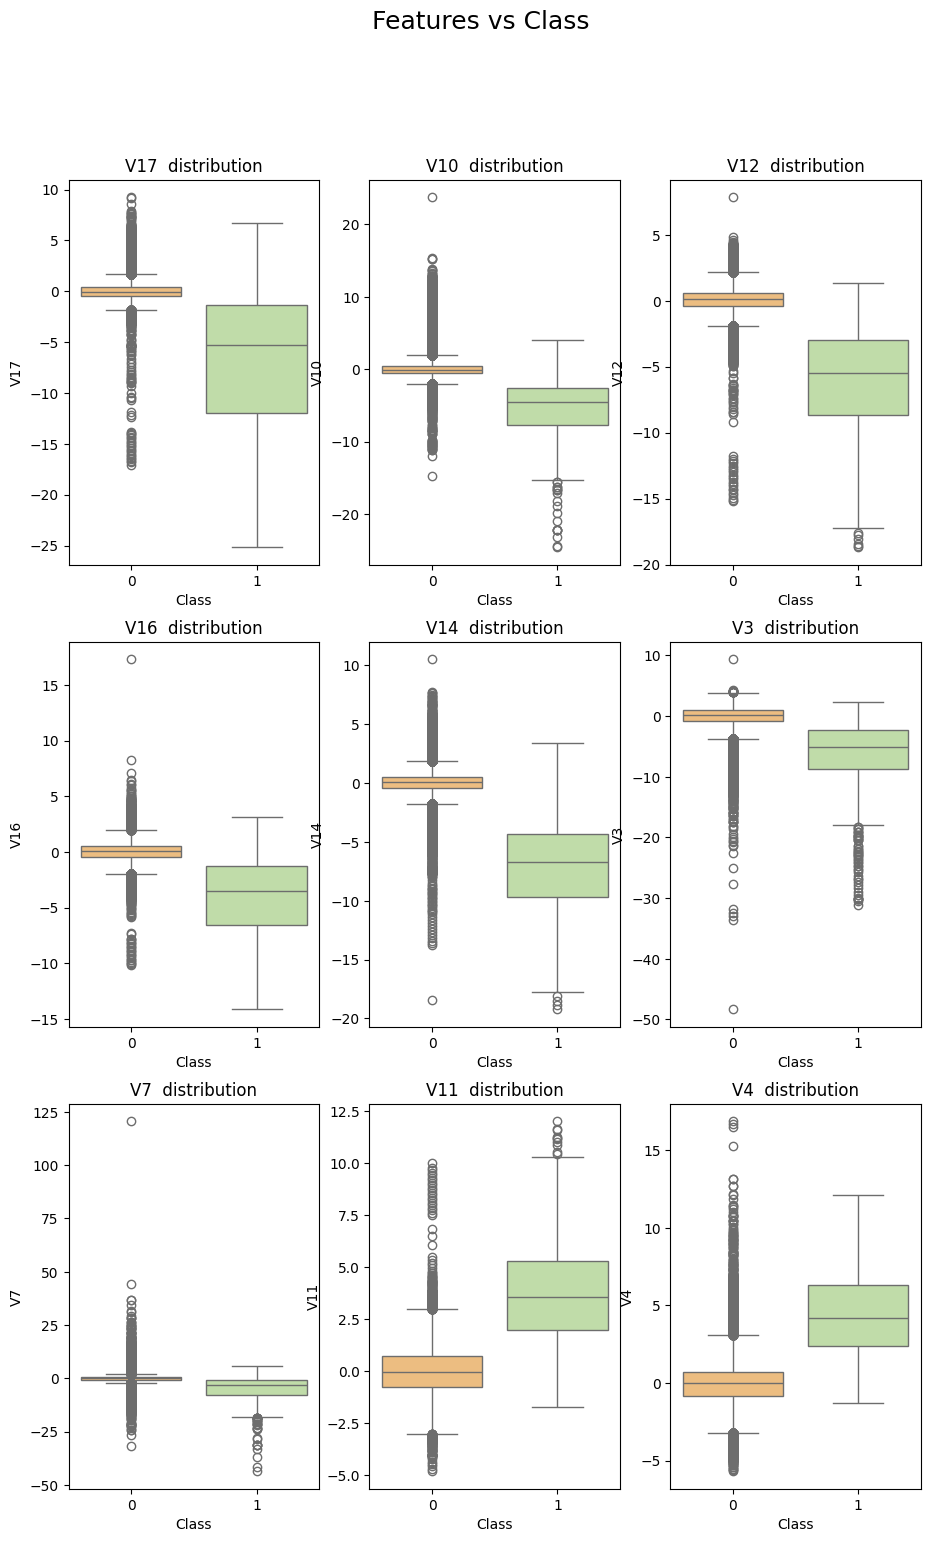

In [15]:
#boxplot visualizations

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(11,17))
fig.suptitle('Features vs Class', size = 18)

sns.boxplot(ax=axes[0, 0], data=df, x='Class', y='V17', hue='Class', palette='Spectral', legend=False)
axes[0, 0].set_title('V17  distribution')

sns.boxplot(ax=axes[0, 1], data=df, x='Class', y='V10', hue='Class', palette='Spectral', legend=False)
axes[0, 1].set_title('V10  distribution')

sns.boxplot(ax=axes[0, 2], data=df, x='Class', y='V12', hue='Class', palette='Spectral', legend=False)
axes[0, 2].set_title('V12  distribution')

sns.boxplot(ax=axes[1, 0], data=df, x='Class', y='V16', hue='Class', palette='Spectral', legend=False)
axes[1, 0].set_title('V16  distribution')

sns.boxplot(ax=axes[1, 1], data=df, x='Class', y='V14', hue='Class', palette='Spectral', legend=False)
axes[1, 1].set_title('V14  distribution')

sns.boxplot(ax=axes[1, 2], data=df, x='Class', y='V3', hue='Class', palette='Spectral', legend=False)
axes[1, 2].set_title('V3  distribution')

sns.boxplot(ax=axes[2, 0], data=df, x='Class', y='V7', hue='Class', palette='Spectral', legend=False)
axes[2, 0].set_title('V7  distribution')

sns.boxplot(ax=axes[2, 1], data=df, x='Class', y='V11', hue='Class', palette='Spectral', legend=False)
axes[2, 1].set_title('V11  distribution')

sns.boxplot(ax=axes[2, 2], data=df, x='Class', y='V4', hue='Class', palette='Spectral', legend=False)
axes[2, 2].set_title('V4  distribution')

plt.tight_layout

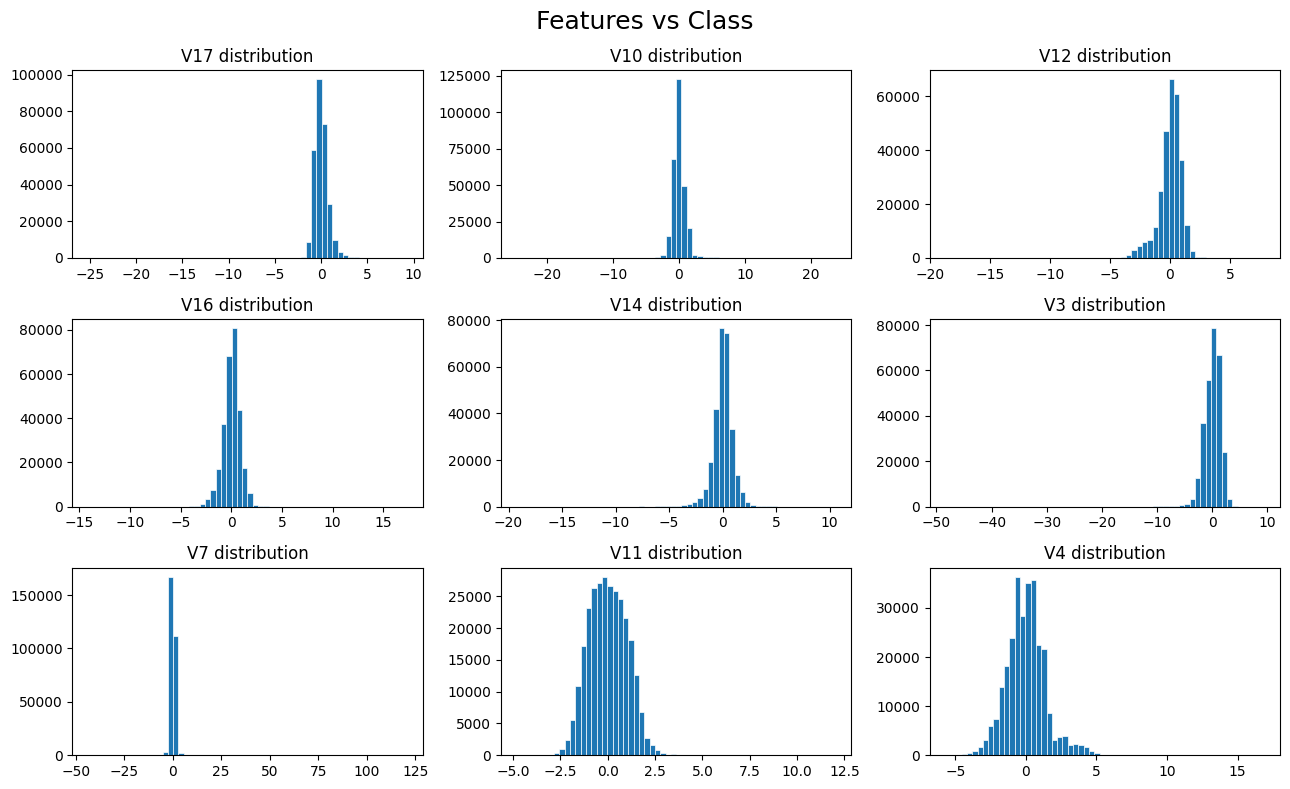

In [16]:
# histogram visualization
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13,8))
fig.suptitle('Features vs Class', size = 18)

axes[0,0].hist(df['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

In [22]:
"""
Tukey's IQR Method
1. find first quartile, Q1
2. find third quartile, Q3
3. find interquartile range, IQR = Q3 - Q1
4. define normal data range as:
      lower limit = Q1 - 1.5 IGR
      upper limit = Q3 + 1.5 IQR
5. find outliers, which is any point outside of this range
"""

def IQR_method(df, n, features):
  outlier_list = []

  for column in features:
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR

    # determine a list of indices of outliers
    outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
    outlier_list.extend(outlier_list_column)

  outlier_list = Counter(outlier_list)
  multiple_outliers = list(k for k, v in outlier_list.items() if v > n)

  # calculate number of records below and above lower and above bound value
  df1 = df[df[column] < Q1 - outlier_step]
  df2 = df[df[column] > Q3 + outlier_step]

  print('Total number of outliers is:', df1.shape[0]+df2.shape[0])

  return multiple_outliers

In [23]:
Outliers_IQR = IQR_method(df, 1, feature_list)

df_out = df.drop(Outliers_IQR, axis=0).reset_index(drop=True)

Total number of outliers is: 31904


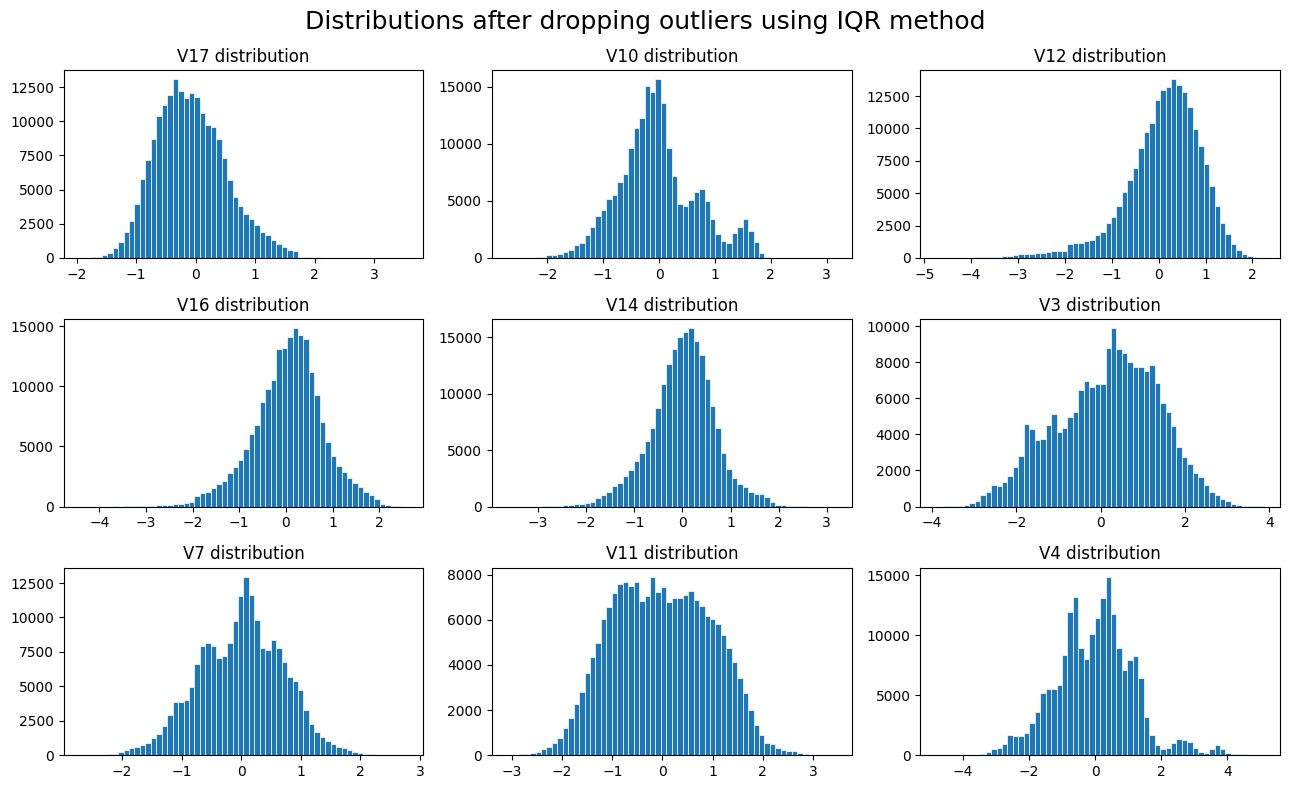

In [24]:
# check dist after dropping outliers

# histogram visualization
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13,8))
fig.suptitle('Distributions after dropping outliers using IQR method', size = 18)

axes[0,0].hist(df_out['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df_out['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df_out['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df_out['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df_out['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df_out['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df_out['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df_out['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df_out['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

In [25]:
# standard deviation method
# more susceptible to large values

def StDev_method (df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations
    containing more than n outliers according to the standard deviation method.
    """
    outlier_indices = []

    for column in features:
        # calculate the mean and standard deviation of the data frame
        data_mean = df[column].mean()
        data_std = df[column].std()

        # calculate the cutoff value
        cut_off = data_std * 3

        # Determining a list of indices of outliers for feature column
        outlier_list_column = df[(df[column] < data_mean - cut_off) | (df[column] > data_mean + cut_off)].index

        # appending the found outlier indices for column to the list of outlier indices
        outlier_indices.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > data_mean + cut_off]
    df2 = df[df[column] < data_mean - cut_off]
    print('Total number of outliers is:', df1.shape[0]+ df2.shape[0])

    return multiple_outliers

# detecting outliers
Outliers_StDev = StDev_method(df,1,feature_list)

# dropping outliers
df_out2 = df.drop(Outliers_StDev, axis = 0).reset_index(drop=True)


Total number of outliers is: 4076


The lower bound value is: -3.0621390831346553
The upper bound value is: 3.062139083134659


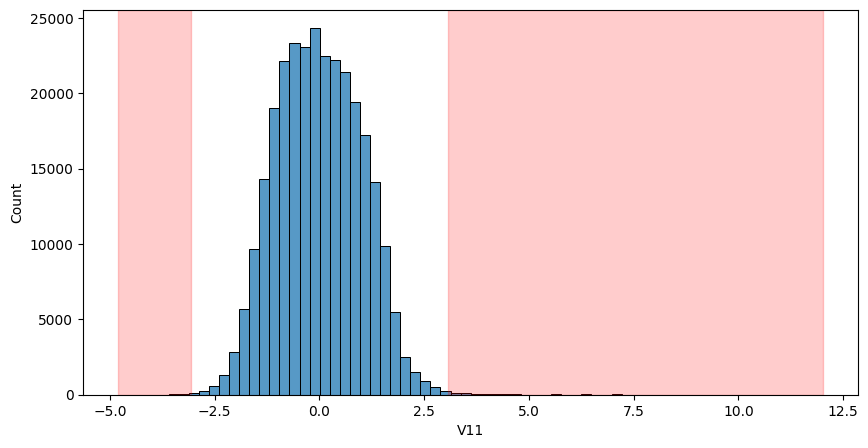

In [26]:
data_mean, data_std = df['V11'].mean(), df['V11'].std()
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

print('The lower bound value is:', data_mean - cut_off)
print('The upper bound value is:', data_mean + cut_off)

plt.figure(figsize=(10,5))
sns.histplot(x='V11', data=df, bins=70)
plt.axvspan(xmin=lower, xmax=df.V11.min(), alpha=0.2, color='red')
plt.axvspan(xmin=df.V11.max(), xmax=upper, alpha=0.2, color='red')

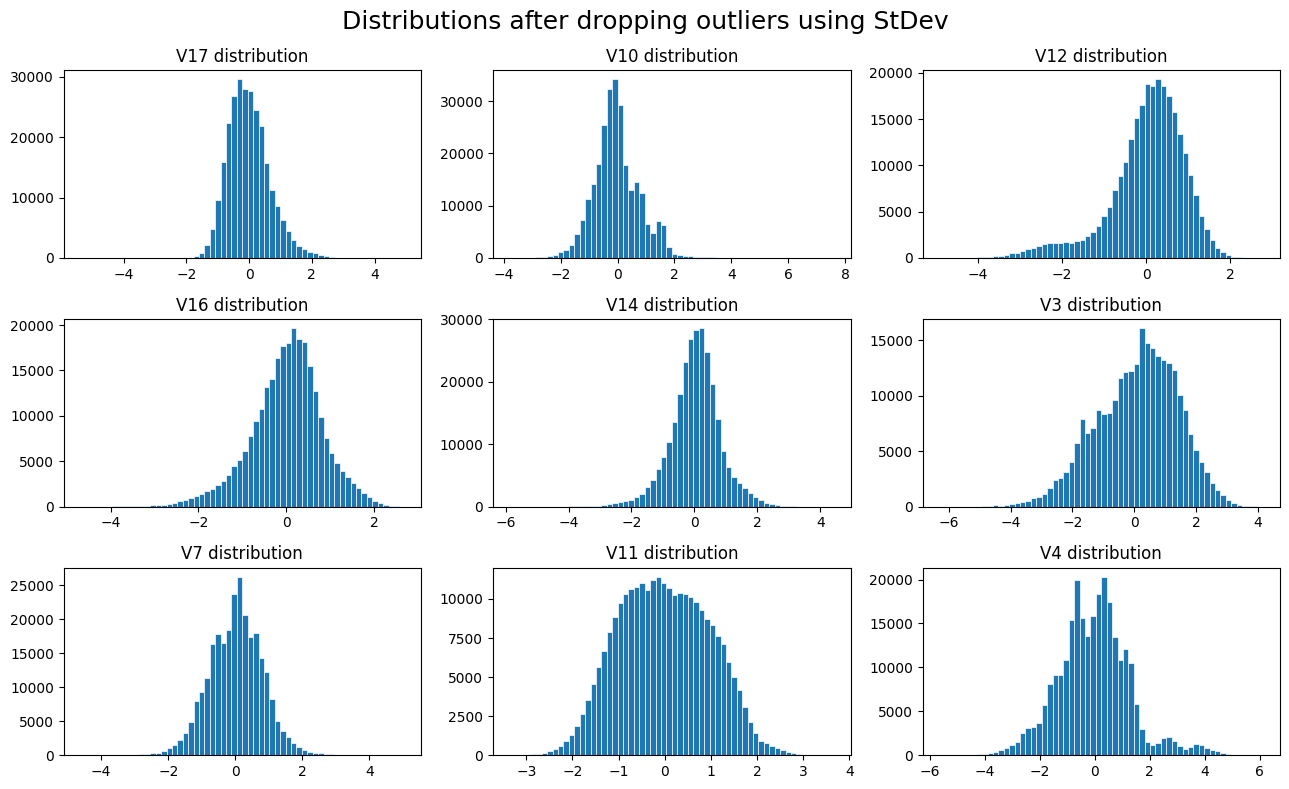

In [27]:
#checking distributions of most important features after dropping outliers
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13,8))
fig.suptitle('Distributions after dropping outliers using StDev', size = 18)

axes[0,0].hist(df_out2['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df_out2['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df_out2['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df_out2['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df_out2['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df_out2['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df_out2['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df_out2['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df_out2['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

In [28]:
# z-score method

def z_score_method(df, n, features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations
    containing more than n outliers according to the z-score method.
    """
    outlier_list = []

    for column in features:
        # calculate the mean and standard deviation of the data frame
        data_mean = df[column].mean()
        data_std = df[column].std()
        threshold = 3

        z_score = abs( (df[column] - data_mean)/data_std )

        # Determining a list of indices of outliers for feature column
        outlier_list_column =  df[z_score > threshold].index

        # appending the found outlier indices for column to the list of outlier indices
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of outlier records
    df1 = df[z_score > threshold]
    print('Total number of outliers is:', df1.shape[0])

    return multiple_outliers

In [29]:
#detect outlier

Outliers_z_score = z_score_method(df, 1, feature_list)

# dropping outliers
df_out3 = df.drop(Outliers_z_score, axis = 0).reset_index(drop=True)

Total number of outliers is: 4076


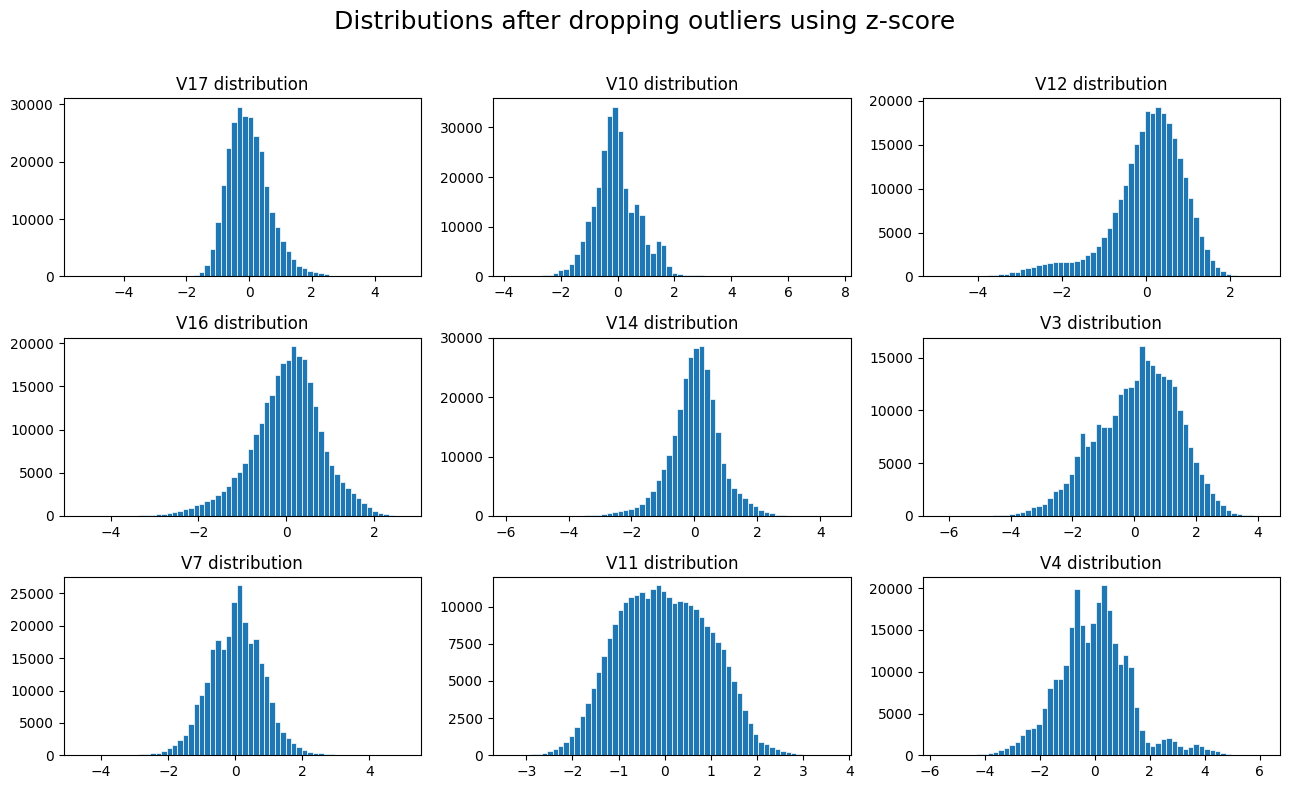

In [31]:
# Checking distributions of most important features after dropping outliers

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))
fig.suptitle('Distributions after dropping outliers using z-score\n', size = 18)

axes[0,0].hist(df_out3['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df_out3['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df_out3['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df_out3['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df_out3['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df_out3['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df_out3['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df_out3['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df_out3['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

In [32]:
'''
modified z-score = 0.675(xi-xvar)/MAD,
  where MAD is the median avsolute deviation of that dataset
used bc it can be very sensitive to extreme values
'''

from scipy.stats import median_abs_deviation

def z_scoremod_method (df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations
    containing more than n outliers according to the z-score modified method.
    """
    outlier_list = []

    for column in features:
        # calculate the mean and standard deviation of the data frame
        data_mean = df[column].mean()
        data_std = df[column].std()
        threshold = 3
        MAD = median_abs_deviation

        mod_z_score = abs(0.6745*(df[column] - data_mean)/MAD(df[column]) )

        # Determining a list of indices of outliers for feature column
        outlier_list_column =  df[mod_z_score >threshold].index

        # appending the found outlier indices for column to the list of outlier indices
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of outlier records
    df1 = df[mod_z_score >threshold]
    print('Total number of outliers is:', df1.shape[0])

    return multiple_outliers

In [33]:
# detect outliers
Outliers_z_score = z_scoremod_method(df,1,feature_list)

# drop outliers
df_out4 = df.drop(Outliers_z_score, axis = 0).reset_index(drop=True)

Total number of outliers is: 33055


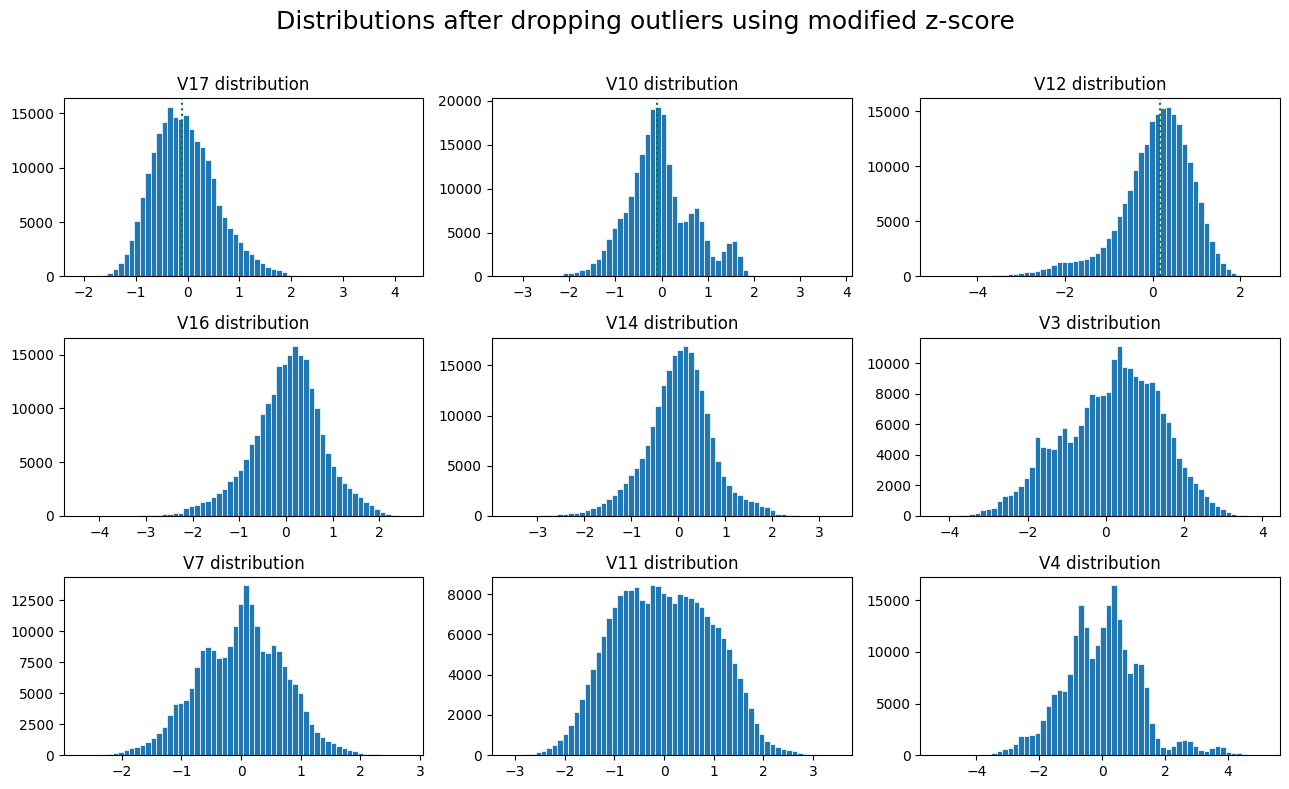

In [34]:
# Checking distributions of most important features after dropping outliers

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))
fig.suptitle('Distributions after dropping outliers using modified z-score\n', size = 18)

axes[0,0].hist(df_out4['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].axvline(np.median(df_out4['V17']), ls=':', c='g', label="Median")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df_out4['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].axvline(np.median(df_out4['V10']), ls=':', c='g', label="Median")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df_out4['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].axvline(np.median(df_out4['V12']), ls=':', c='g', label="Median")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df_out4['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df_out4['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df_out4['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df_out4['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df_out4['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df_out4['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

In [36]:
'''
Isolation Forest (IF)
- based on decision trees
- unsupervised learning algo that identifies anomalies by isolating outliers in the data
'''

from sklearn.ensemble import IsolationForest

df5 = df.copy()
df5 = df5.drop(['Class'], axis=1)

In [37]:
model = IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.01), max_features=1.0)
model.fit(df5)

IsolationForest(contamination=0.01, n_estimators=150)

In [43]:
'''
-1 in the anaomaly column indicates pressence of an anomaly
1 indicates normal data
'''

scores=model.decision_function(df5)
anomaly=model.predict(df5)

df5['scores']=scores
df5['anomaly']=anomaly

df5.head(10)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- anomaly
- scores


In [40]:
anomaly = df5.loc[df5['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))


Total number of outliers is: 2849


In [44]:
df5[df5['anomaly']==-1].head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,scores,anomaly
164,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,-1.724899,...,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,-0.038012,-1
225,-2.687978,4.390230,-2.360483,0.360829,1.310192,-1.645253,2.327776,-1.727825,4.324752,6.286487,...,-0.156951,0.079854,-0.012598,0.207194,-0.536578,0.950393,-0.624431,0.89,-0.010326,-1
1086,-3.245399,4.821746,-2.824895,0.344042,0.953425,-1.718008,1.954975,-1.288209,4.346680,6.371494,...,-0.189655,0.148555,-0.017836,0.283114,-0.529610,0.929110,-0.626002,0.89,-0.015534,-1
1158,-6.169664,6.118940,-1.667775,-1.206991,-0.021373,-1.208458,2.184989,-1.512188,6.450992,11.906868,...,0.261435,0.136166,0.413380,0.666632,-0.530568,2.464962,0.365892,0.89,-0.016997,-1
1388,-3.936794,-3.670519,-1.453820,2.299750,-9.749440,6.456410,10.784088,-2.160016,-0.238116,-1.004398,...,0.957186,2.441960,0.250607,0.300908,1.157867,1.624284,-1.638647,2452.03,-0.035436,-1
1632,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,-2.636622,...,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43,-0.153044,-1
1722,-2.290848,-0.724845,3.090715,-0.746779,2.169533,1.975177,2.225272,-3.043153,3.497999,4.068885,...,1.574634,-0.431065,-0.795598,-1.137964,0.759779,-4.541860,-1.962241,9.95,-0.022377,-1
1830,-3.802820,5.253262,-3.289307,0.327256,0.596659,-1.790763,1.582173,-0.848593,4.368608,6.456500,...,-0.222358,0.217256,-0.023073,0.359035,-0.522643,0.907827,-0.627572,0.89,-0.009845,-1
2016,-1.967159,2.764458,1.083125,-0.904855,2.767055,-0.366271,4.648472,-4.208846,5.647693,9.759894,...,0.612482,-0.611963,-0.494140,-0.151419,-0.824974,-0.785974,-2.909294,3.99,-0.011884,-1
2178,-5.849226,-11.754975,-3.333303,3.673246,-4.459583,0.659098,4.527224,-0.985512,0.237794,-1.854230,...,-1.992179,-3.240351,0.609619,-0.985548,0.089693,-0.713355,0.653060,3669.00,-0.023384,-1


In [45]:
# dropping outliers
df_out5 = df5.drop(anomaly_index, axis = 0).reset_index(drop=True)

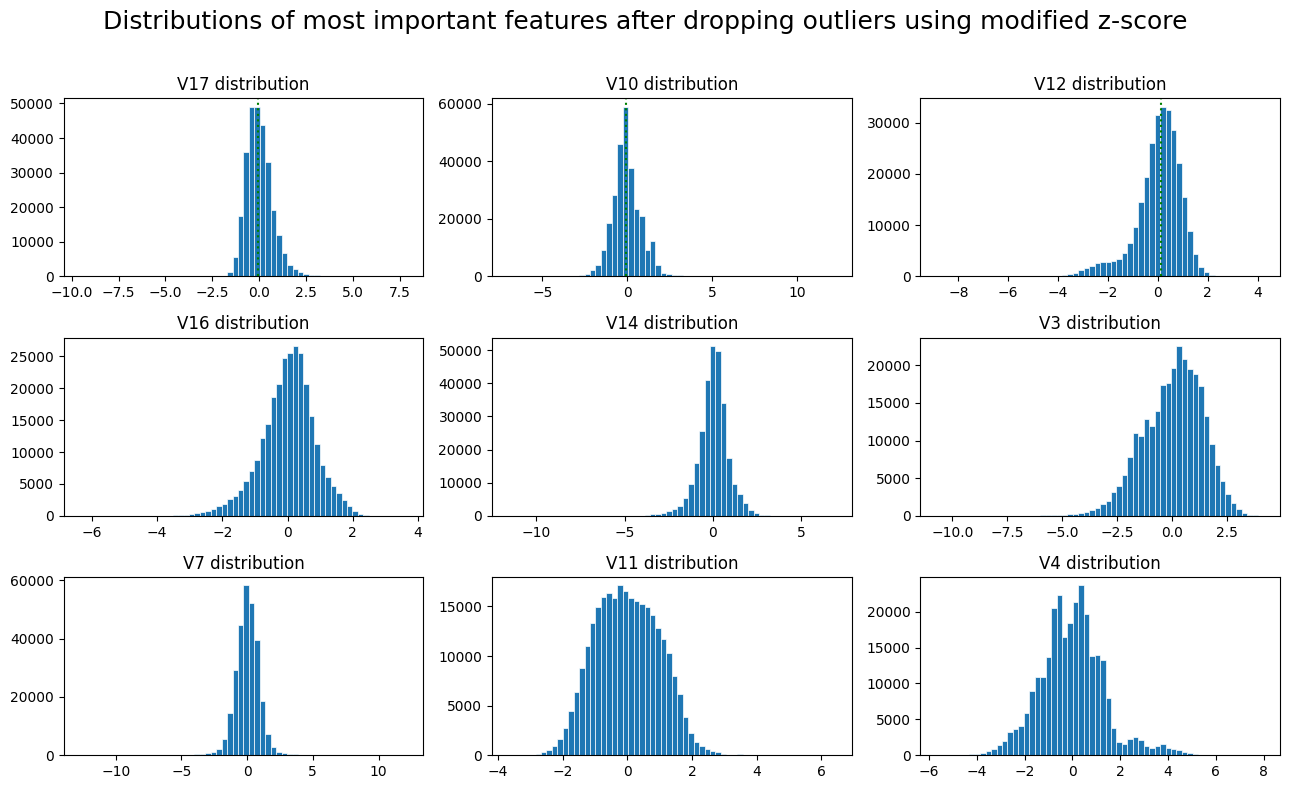

In [46]:
# Checking distributions of most important features after dropping outliers

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))
fig.suptitle('Distributions after dropping outliers using Isolation Forest', size = 18)

axes[0,0].hist(df_out5['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].axvline(np.median(df_out5['V17']), ls=':', c='g', label="Median")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df_out5['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].axvline(np.median(df_out5['V10']), ls=':', c='g', label="Median")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df_out5['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].axvline(np.median(df_out5['V12']), ls=':', c='g', label="Median")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df_out5['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df_out5['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df_out5['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df_out5['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df_out5['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df_out5['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

In [47]:
'''
DBSCAN = Density-Based Spatial Clustering of Applications with Noise
'''

df6=df.copy()
df6=df6.drop(['Class'], axis=1)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df6.values)

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('The number of clusters in dataset is:', n_clusters_)

In [ ]:
pd.Series(labels).value_counts()